<a href="https://colab.research.google.com/github/xiaoyinw/xiaoyinwUSC/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
#cd ..
#mkdir data

In [ ]:
#Problem a

In [ ]:
#specify the column names according to the instructions
column_name = ['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','class']

In [ ]:
#read the data from file
data = pd.read_table('../data/vertebral_column_data/column_2C.dat',sep=' ',header=None,names=column_name,engine='python')

In [ ]:
#Problem b

<Figure size 1440x864 with 0 Axes>

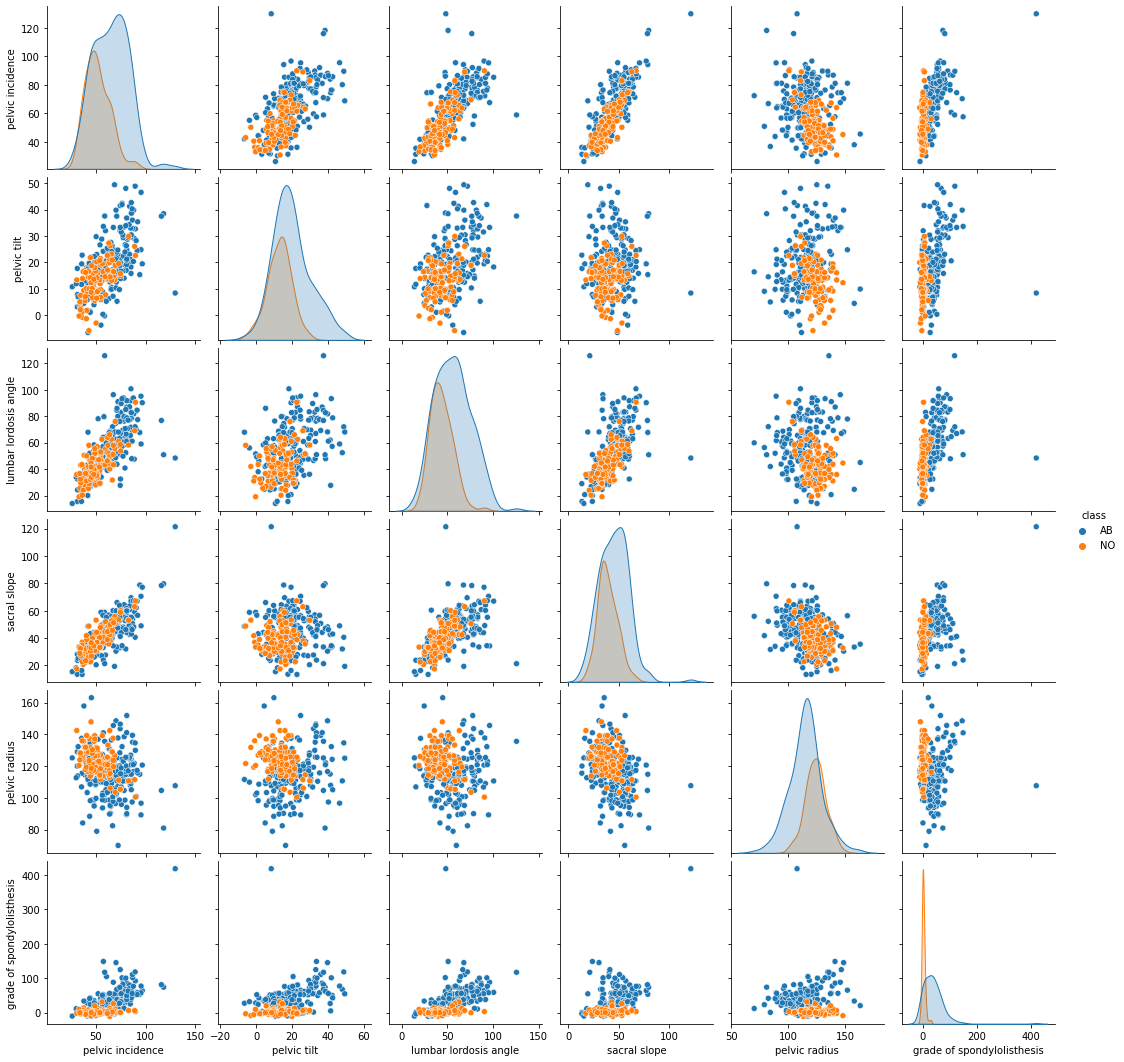

In [ ]:
#Problem bi

plt.figure(figsize=(20,12))
sns.pairplot(data,hue='class',diag_kind='kde')

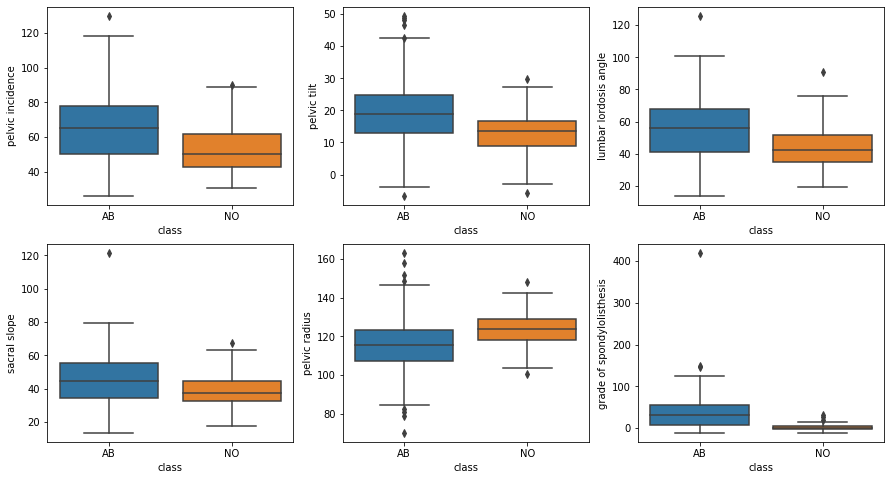

In [ ]:
#Problem bii

f,axes=plt.subplots(2,3,figsize=(15,8))
sns.boxplot(x="class",y="pelvic incidence",data=data,ax=axes[0,0])
sns.boxplot(x="class",y="pelvic tilt",data=data,ax=axes[0,1])
sns.boxplot(x="class",y="lumbar lordosis angle",data=data,ax=axes[0,2])
sns.boxplot(x="class",y="sacral slope",data=data,ax=axes[1,0])
sns.boxplot(x="class",y="pelvic radius",data=data,ax=axes[1,1])
sns.boxplot(x="class",y="grade of spondylolisthesis",data=data,ax=axes[1,2])

In [ ]:
#Problem biii

class_0 = data[data['class']=='NO']
class_1 = data[data['class']=='AB']
#for the class 0
trainset_0=class_0[:70]
testset_0=class_0[70:]

#for the class 1
trainset_1=class_1[:140]
testset_1=class_1[140:]

#build the trainset and testset
trainset=pd.concat([trainset_0,trainset_1],ignore_index=True)
testset=pd.concat([testset_0,testset_1],ignore_index=True)

In [ ]:
#Problem c

In [ ]:
#Problem ci
#Write code for k-nearest neighbors with Euclidean metric (or use a software package)
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Problem cii

#get independent variables
trainset_x=trainset.iloc[:,:-1]
testset_x=testset.iloc[:,:-1]
#get dependent variables
trainset_y=trainset.iloc[:,-1:]
testset_y=testset.iloc[:,-1:]

In [ ]:
#use list to record train errors and test errors
train_error = []
test_error = []
#train and test the KNN model, record the results by error lists
for i in range(1,208,3):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(trainset_x,trainset_y)
  train_pred = KNN.predict(trainset_x)
  test_pred = KNN.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  train = np.array(trainset_y).reshape(210)
  train_error.append(np.mean(train_pred!=train,dtype=np.float32))
  test_error.append(np.mean(test_pred!=test,dtype=np.float32))

Text(0, 0.5, 'error rate')

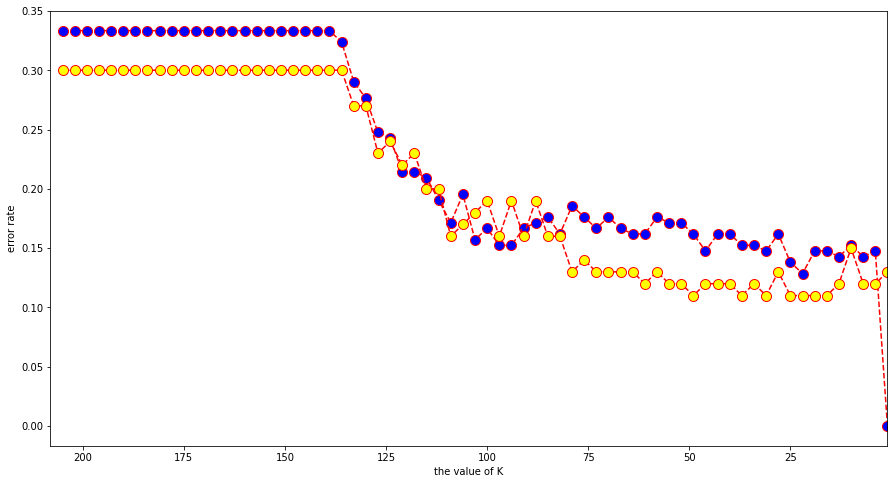

In [ ]:
#plot the train and test errors in terms of K
plt.figure(figsize=(15,8))
plt.plot(np.arange(1,208,3),train_error,color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.plot(np.arange(1,208,3),test_error,color='red', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.xlim(208,1)
plt.xlabel('the value of K')
plt.ylabel('error rate')

In [ ]:
#get the best K according to the results
bestK=np.argmin(test_error)

In [ ]:
#get the best K according to the results
bestK=np.argmin(test_error)

#build the KNN model using the best K
KNN = KNeighborsClassifier(n_neighbors=bestK)
KNN.fit(trainset_x,trainset_y)

#get the prediction and ground true valus
pred=KNN.predict(testset_x)
test=np.array(testset_y).reshape(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
#build confusion_matrix
confusion_Best_KNN = confusion_matrix(test,pred)
confusion_Best_KNN

array([[70,  0],
       [10, 20]])

In [ ]:
#get the true negatives and true positives
true_negatives=confusion_Best_KNN[0][0]
false_positives=confusion_Best_KNN[0][1]
false_negatives=confusion_Best_KNN[1][0]
true_positives=confusion_Best_KNN[1][1]
print("the true negatives rate is "+str(true_negatives/(true_negatives+false_positives)))
print("the true positives is "+str(true_positives/(true_positives+false_negatives)))

the true negatives rate is 1.0
the true positives is 0.6666666666666666


In [ ]:
#get the precision and F1-score
test[test=='AB']=1
test[test=='NO']=0
pred[pred=='AB']=1
pred[pred=='NO']=0
pred.astype('int')
test.astype('int')
test=list(test)
pred=list(pred)
precision=precision_score(test,pred)
f1score=f1_score(test,pred)
print('the precision is '+str(precision))
print('the F1 score is '+str(f1score))

the precision is 0.875
the F1 score is 0.9333333333333333


In [ ]:
#define a function to calculate the best error rate for different datasets
def get_best_error_rate(trainset,testset,N):
  #get independent variables
  trainset_x=trainset.iloc[:,:-1]
  testset_x=testset.iloc[:,:-1]
  #get dependent variables
  trainset_y=trainset.iloc[:,-1:]
  testset_y=testset.iloc[:,-1:]

  error = []

  for i in range(1,N,5):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(trainset_x,trainset_y)
    pred = KNN.predict(testset_x)
    test = np.array(testset_y).reshape(100)
    error.append(np.mean(pred!=test,dtype=np.float32))
  return min(error)

In [ ]:
#get the best error rates for dataset with different sizes
best_error_rates = []
for i in range(10,220,10):
  trainsubset_0=trainset_0[:int(i/3)]
  trainsubset_1=trainset_1[:int(i-i/3)]
  trainsubset=pd.concat([trainsubset_0,trainsubset_1],ignore_index=True)
  best_error_rate = get_best_error_rate(trainsubset,testset,i)
  best_error_rates.append(best_error_rate)

Text(0, 0.5, 'best error rate')

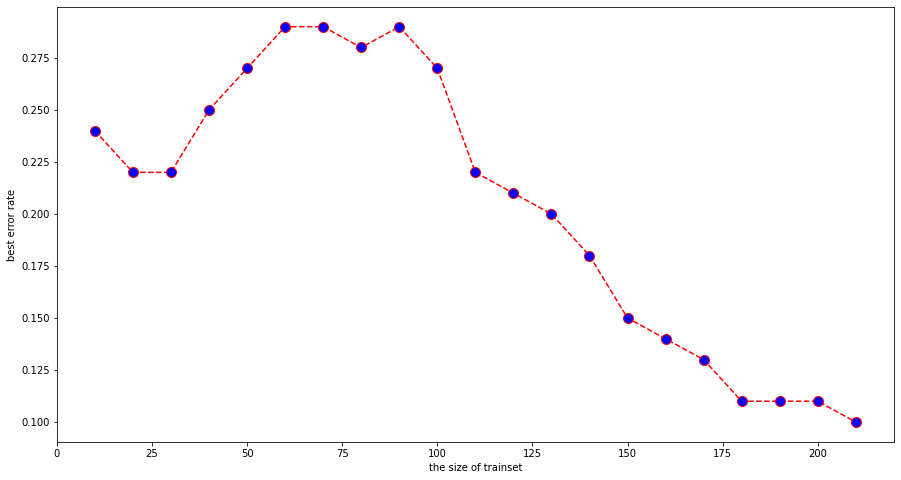

In [ ]:
#plot the Learning Curve
plt.figure(figsize=(15,8))
plt.plot(np.arange(10,220,10),best_error_rates,color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.xlabel('the size of trainset')
plt.ylabel('best error rate')

In [ ]:
#Problem d

In [ ]:
Best_K = []
Best_error_rates = []

In [ ]:
trainset=pd.concat([trainset_0,trainset_1],ignore_index=True)
testset=pd.concat([testset_0,testset_1],ignore_index=True)

In [ ]:
#get independent variables
trainset_x=trainset.iloc[:,:-1]
testset_x=testset.iloc[:,:-1]
#get dependent variables
trainset_y=trainset.iloc[:,-1:]
testset_y=testset.iloc[:,-1:]

In [ ]:
#Problem di A
#Calculate the best error rates and best k for Manhattan Distance
Manhattan_error_rates = []
Manhattan_Ks = []
for i in range(1,196,5):
  Manhattan_KNN = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=1)
  Manhattan_KNN.fit(trainset_x,trainset_y)
  pred = Manhattan_KNN.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Manhattan_error_rates.append(np.mean(pred!=test,dtype=np.float32))
  Manhattan_Ks.append(i)

In [ ]:
#Show the result of Manhattan
Manhattan_Best_K = Manhattan_Ks[np.argmin(Manhattan_error_rates)]
Best_K.append(Manhattan_Best_K)
Best_error_rates.append(min(Manhattan_error_rates))
print("Manhattan Distance best K is "+str(Manhattan_Best_K))
print("Manhattan best error rate is "+str(min(Manhattan_error_rates)))

Manhattan Distance best K is 11
Manhattan best error rate is 0.11


In [ ]:
#Problem di B
#Calculate the best error rates and best k for Minkowski Distance
Minkowski_error_rates = []
log10p = []
for i in range(1,11,1):
  minkowski_KNN = KNeighborsClassifier(n_neighbors=bestK,metric='minkowski',p=np.power(10,i/10))
  minkowski_KNN.fit(trainset_x,trainset_y)
  pred = minkowski_KNN.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Minkowski_error_rates.append(np.mean(pred!=test,dtype=np.float32))
  log10p.append(i/10)

In [ ]:
#Show the result
best_log10p = log10p[np.argmin(Minkowski_error_rates)]
Best_K.append(best_log10p)
Best_error_rates.append(min(Minkowski_error_rates))
print("Minkowsk Distance best log10p is "+str(best_log10p))
print("Minkowsk best error rate is "+str(min(Minkowski_error_rates)))

Minkowsk Distance best log10p is 0.5
Minkowsk best error rate is 0.09


In [ ]:
#Probelm di C
#Calculate the best error rate and best k for Chebyshev distance
Chebyshev_error_rates = []
Chebyshev_Ks = []
for i in range(1,201,5):
  Chebyshev_KNN = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=float('inf'))
  Chebyshev_KNN.fit(trainset_x,trainset_y)
  pred = Chebyshev_KNN.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Chebyshev_error = np.mean(pred!=test,dtype=np.float32)
  Chebyshev_error_rates.append(Chebyshev_error)
  Chebyshev_Ks.append(i)

In [ ]:
#Show the result
Chebyshev_Best_K = Chebyshev_Ks[np.argmin(Chebyshev_error_rates)]
Best_K.append(Chebyshev_Best_K)
Best_error_rates.append(min(Chebyshev_error_rates))
print("Chebyshev Distance best K is "+str(Chebyshev_Best_K))
print("Chebyshev best error rate is "+str(min(Chebyshev_error_rates)))

Chebyshev Distance best K is 21
Chebyshev best error rate is 0.11


In [ ]:
#Problem dii
#Calculate the best error rate and best k for Mahalanbois distance
Mahalanbois_error_rates = []
Mahalanbois_Ks = []
for i in range(1,201,5):
  mahalanobis_KNN = KNeighborsClassifier(algorithm='brute',n_neighbors=i,metric='mahalanobis',metric_params={'V': np.cov(trainset_x)})
  mahalanobis_KNN.fit(trainset_x,trainset_y)
  pred = mahalanobis_KNN.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Mahalanobis_error = np.mean(pred!=test,dtype=np.float32)
  Mahalanbois_error_rates.append(Mahalanobis_error)
  Mahalanbois_Ks.append(i)

In [ ]:
#Show the result
Mahalanbois_Best_K = Mahalanbois_Ks[np.argmin(Mahalanbois_error_rates)]
Best_K.append(Mahalanbois_Best_K)
Best_error_rates.append(min(Mahalanbois_error_rates))
print("Mahalanbois Distance best K is "+str(Mahalanbois_Best_K))
print("Mahalanbois best error rate is "+str(min(Mahalanbois_error_rates)))

Mahalanbois Distance best K is 1
Mahalanbois best error rate is 0.18


In [ ]:
#Make a summary for the test results
summary_of_Different_Distances=pd.DataFrame({'Best K or log10p':Best_K, 'Best error rates':Best_error_rates})
summary_of_Different_Distances.index = ['Manhattan','Minkowski','Chebyshev','Mahalanobis']
summary_of_Different_Distances

,Best K or log10p,Best error rates
Manhattan,11.0,0.11
Minkowski,0.5,0.09
Chebyshev,21.0,0.11
Mahalanobis,1.0,0.18


In [ ]:
#Problem e 

#Calculate the Euclidean error rates and according K with weighted decision
Euclidean_KNN_distance_error_rates = []
Euclidean_KNN_distance_Ks = []
for i in range(1,201,5):
  Euclidean_KNN_distance = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2,weights='distance')
  Euclidean_KNN_distance.fit(trainset_x,trainset_y)
  pred = Euclidean_KNN_distance.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Euclidean_KNN_distance_error = np.mean(pred!=test,dtype=np.float32)
  Euclidean_KNN_distance_error_rates.append(Euclidean_KNN_distance_error)
  Euclidean_KNN_distance_Ks.append(i)

#Calculate the Manhattan error rates and according K with weighted decision
Manhattan_KNN_distance_error_rates = []
Manhattan_KNN_distance_Ks = []
for i in range(1,201,5):
  Manhattan_KNN_distance = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=1,weights='distance')
  Manhattan_KNN_distance.fit(trainset_x,trainset_y)
  pred = Manhattan_KNN_distance.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Manhattan_KNN_distance_error = np.mean(pred!=test,dtype=np.float32)
  Manhattan_KNN_distance_error_rates.append(Manhattan_KNN_distance_error)
  Manhattan_KNN_distance_Ks.append(i)

#Calculate the Chebyshev error rates and according K with weighted decision
Chebyshev_KNN_distance_error_rates = []
Chebyshev_KNN_distance_Ks = []
for i in range(1,201,5):
  Chebyshev_KNN_distance = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=float('inf'),weights='distance')
  Chebyshev_KNN_distance.fit(trainset_x,trainset_y)
  pred = Manhattan_KNN_distance.predict(testset_x)
  test = np.array(testset_y).reshape(100)
  Chebyshev_KNN_distance_error = np.mean(pred!=test,dtype=np.float32)
  Chebyshev_KNN_distance_error_rates.append(Chebyshev_KNN_distance_error)
  Chebyshev_KNN_distance_Ks.append(i)

In [ ]:
Euclidean_KNN_distance_best_error_rate = min(Euclidean_KNN_distance_error_rates)
Manhattan_KNN_distance_best_error_rate = min(Manhattan_KNN_distance_error_rates)
Chebyshev_KNN_distance_best_error_rate = min(Chebyshev_KNN_distance_error_rates)

In [ ]:
#report the best error rates for three distance metrics
distance_best_error_rates = [Euclidean_KNN_distance_best_error_rate,Manhattan_KNN_distance_best_error_rate,Chebyshev_KNN_distance_best_error_rate]
weighted_dicision = pd.DataFrame({'weighted dicision':distance_best_error_rates})
weighted_dicision.index = ['Euclidean','Manhattan','Chebyshev']
weighted_dicision

,weighted dicision
Euclidean,0.10
Manhattan,0.10
Chebyshev,0.29


In [ ]:
#Problem f
#report the best classification result for my homework1
print('my lowest training error rate achieved in this homework is '+str(0.10))

my lowest training error rate achieved in this homework is 0.1
